# Customer Segmentation in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Customer Segmentation in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Cohort Analysis
from datetime import datetime

# CHAPTER 2 - Recency, Frequency, Monetary Value analysis
import random
from datetime import timedelta

# CHAPTER 3 - Data pre-processing for clustering
from sklearn.preprocessing import StandardScaler

# CHAPTER 4 - Customer Segmentation with K-means
from sklearn.cluster import KMeans


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Cohort Analysis


In this first chapter, you will learn about cohorts and how to analyze them. You will create your own customer cohorts, get some metrics and visualize your results.

#### Exercício 1 - Introduction to Cohort Analysis

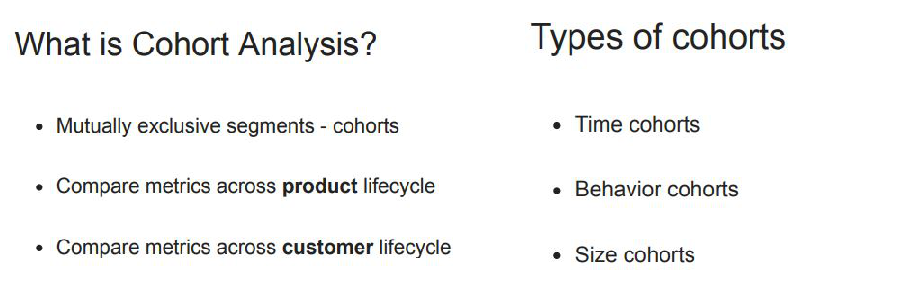

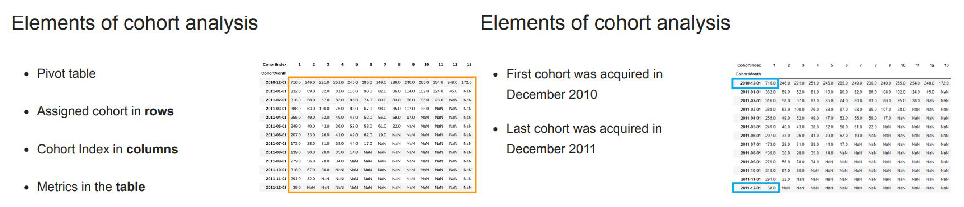

In [5]:
#vídeo
plot_2('cohort', 'types_cohorts')
plot_2('elements_cohort', 'elements_cohort_2')

Exercício 2

In [6]:
# How many customers acquired?

cohort_counts = pd.read_csv(data_folder + "cohort_counts.csv")

# How many customers have made their first transaction in January 2011? ---> 332
cohort_counts

,CohortMonth,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
1,2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2,2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
3,2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
4,2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
5,2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,279.0,56.0,78.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercício 3 - Cohort Analysis

Time cohorts:


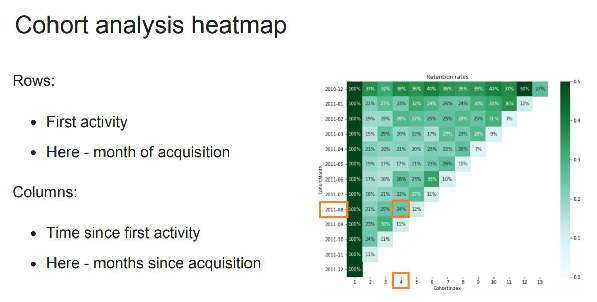

This number means that 24% of the cohort which signed up in 2011/08 was active 4 months later.
(Month 1 is the month of the first purchase)


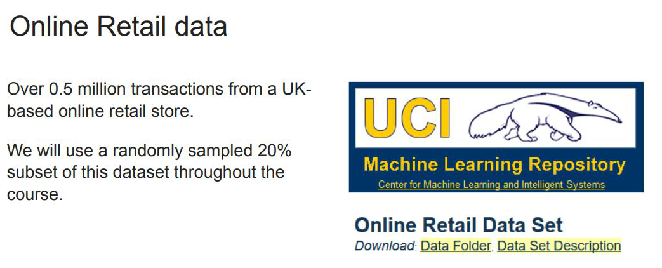

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [7]:
#vídeo

# The most popular cohort analysis - time cohorts
print("Time cohorts:")
plot_1('heatmap', right=2)
print("""This number means that 24% of the cohort which signed up in 2011/08 was active 4 months later.
(Month 1 is the month of the first purchase)""")
plot_1('uci_dataset', right=1.5)

# data
online = pd.read_csv(data_folder + "online.csv").drop('Unnamed: 0', axis=1)
online.head()

In [8]:
# Assign acquisition month cohort

from datetime import datetime
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

def get_month_year(x): 
    return datetime(x.year, x.month, 1)  # day 1

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month_year)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [9]:
# Extract integer values from data

# Define function to extract year, month and day integer values.
# We will use it throughout the course.
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Assign time offset value
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

online['CohortIndex'] = years_diff*12 + months_diff + 1   # +1: marked as 1 for easier interpretation
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [10]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
grouping['CustomerID'].apply(pd.Series.nunique).reset_index().head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


In [11]:
# Count monthly active customers from each cohort
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exercício 4

In [12]:
# Assign daily acquisition cohort

from datetime import datetime
online = pd.read_csv(data_folder + "online.csv").drop('Unnamed: 0', axis=1)
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

# Define a function that will parse the date
def get_day(x): 
    return datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min')

# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


Exercício 5

In [13]:
# Calculate time offset in days - part 1

# First, we will create 6 variables that capture the integer value of years, months and days for Invoice and Cohort Date 
# using the get_date_int() function:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')


Exercício 6

In [14]:
# Calculate time offset in days - part 2

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,195
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,69
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25,91


In [15]:
# You have successfully assigned the daily time offset to each transaction and can use it for running daily cohort analysis.

# meu
grouping = online.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='CustomerID')
cohort_counts.head() 

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,69.0,3.0,1.0,NaN,3.0,5.0,2.0,4.0,4.0,2.0,...,4.0,4.0,6.0,NaN,NaN,3.0,5.0,3.0,4.0,1.0
2010-12-02,78.0,NaN,NaN,NaN,1.0,3.0,2.0,4.0,3.0,NaN,...,2.0,2.0,NaN,NaN,3.0,1.0,2.0,2.0,1.0,NaN
2010-12-03,30.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
2010-12-05,59.0,3.0,2.0,1.0,4.0,2.0,NaN,5.0,7.0,3.0,...,7.0,3.0,2.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN
2010-12-06,57.0,NaN,2.0,1.0,1.0,NaN,1.0,3.0,6.0,2.0,...,1.0,2.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN


#### Exercício 7 - Cohort Metrics

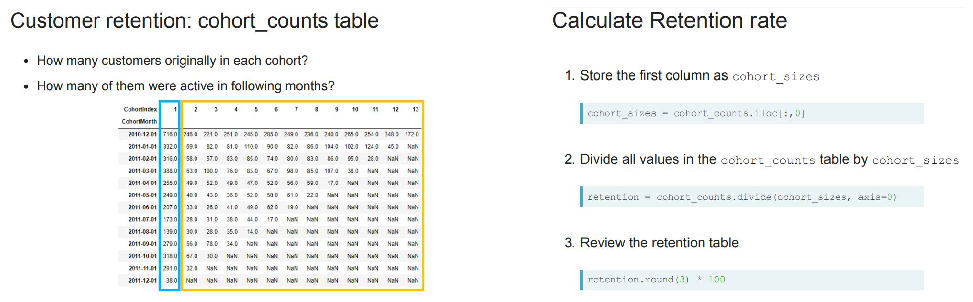

Retention table (per cent values):


CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,100.0,4.3,1.4,NaN,4.3,7.2,2.9,5.8,5.8,2.9,...,5.8,5.8,8.7,NaN,NaN,4.3,7.2,4.3,5.8,1.4
2010-12-02,100.0,NaN,NaN,NaN,1.3,3.8,2.6,5.1,3.8,NaN,...,2.6,2.6,NaN,NaN,3.8,1.3,2.6,2.6,1.3,NaN
2010-12-03,100.0,NaN,3.3,3.3,NaN,NaN,3.3,NaN,NaN,NaN,...,6.7,NaN,3.3,6.7,3.3,3.3,3.3,NaN,NaN,NaN
2010-12-05,100.0,5.1,3.4,1.7,6.8,3.4,NaN,8.5,11.9,5.1,...,11.9,5.1,3.4,5.1,3.4,1.7,NaN,NaN,NaN,NaN
2010-12-06,100.0,NaN,3.5,1.8,1.8,NaN,1.8,5.3,10.5,3.5,...,1.8,3.5,7.0,5.3,1.8,NaN,NaN,NaN,NaN,NaN
2010-12-07,100.0,NaN,2.8,2.8,NaN,NaN,2.8,2.8,NaN,NaN,...,5.6,11.1,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-08,100.0,NaN,NaN,NaN,2.9,1.4,7.2,4.3,1.4,2.9,...,7.2,4.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,100.0,NaN,NaN,NaN,2.0,2.0,2.0,3.9,3.9,NaN,...,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,100.0,NaN,NaN,2.9,8.8,2.9,2.9,5.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#vídeo

plot_2('customer_retention', 'retention_rate', right=2.5)

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)  # divide along the row axis
retention_round = retention.round(3) * 100

# sample of the retention table
print("Retention table (per cent values):")
retention_round.iloc[:10, :]

In [17]:
# Other metrics
print("Other metrics - Average quantity for each cohort:")

grouping = online.groupby(['CohortDay', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='Quantity')
average_quantity = average_quantity.round(1)
average_quantity.iloc[:10, :]

Other metrics - Average quantity for each cohort:


CohortIndex,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01,11.2,9.1,8.0,NaN,4.3,13.4,43.2,4.1,7.6,12.6,...,9.2,17.0,3.7,NaN,NaN,32.7,10.9,38.6,2.6,42.5
2010-12-02,13.5,NaN,NaN,NaN,2.7,7.9,10.7,9.7,21.5,NaN,...,14.0,13.6,NaN,NaN,9.9,144.0,10.4,8.0,11.7,NaN
2010-12-03,8.8,NaN,3.7,1.1,NaN,NaN,3.3,NaN,NaN,NaN,...,3.3,NaN,3.7,4.5,15.4,4.5,1.8,NaN,NaN,NaN
2010-12-05,5.7,6.5,5.2,4.9,3.3,7.6,NaN,10.6,9.5,2.7,...,3.4,8.5,6.6,7.4,4.6,4.2,NaN,NaN,NaN,NaN
2010-12-06,7.4,NaN,38.6,11.8,1.7,NaN,1.9,8.8,4.0,8.2,...,1.3,24.5,19.4,7.6,20.0,NaN,NaN,NaN,NaN,NaN
2010-12-07,30.3,NaN,96.0,20.0,NaN,NaN,21.6,6.0,NaN,NaN,...,11.0,16.4,118.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-08,9.8,NaN,NaN,NaN,3.3,1.0,4.6,2.8,10.4,8.6,...,14.6,3.2,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,9.3,NaN,NaN,NaN,11.2,13.0,1.0,4.8,6.5,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-10,11.4,NaN,NaN,2.0,10.8,1.0,1.3,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exercício 8

In [18]:
# Customer retention

# Customer retention is a very useful metric to understand how many of all the customers are still active.
# Which of the following best describes customer retention?
print("""Percentage of active customers out of total customers.""")

Percentage of active customers out of total customers.


Exercício 9

In [19]:
# Calculate retention rate from scratch

# The online dataset has been loaded to you with monthly cohorts and cohort index assigned from this lesson. 
# Also, we have created a loaded a groupby object as grouping DataFrame
online = pd.read_csv(data_folder + "online.csv").drop('Unnamed: 0', axis=1)
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month_year)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')

invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

online['CohortIndex'] = years_diff*12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [20]:
# Calculate retention rate from scratch

grouping = online.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exercício 10

In [21]:
# Calculate average price

# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.0,3.0,3.0,2.8,2.7,6.9,2.8,3.0,2.7,2.7,3.0,2.8,2.6
2011-01-01,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2011-02-01,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
2011-03-01,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
2011-04-01,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercício 11 - Visualizing cohort analysis

Heatmap:
 - Easiest way to visualize cohort analysis
 - Includes both data and visuals
 - Only few lines of code with seaborn


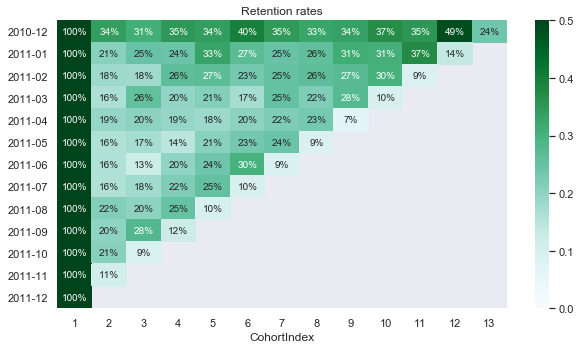

In [22]:
#vídeo

print("""Heatmap:
 - Easiest way to visualize cohort analysis
 - Includes both data and visuals
 - Only few lines of code with seaborn""")

# pequeno ajuste
retention.index = [i[:7] for i in retention.index.map(str)]

# Heatmap
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')  #vmin e vmax para melhor visualização
plt.title('Retention rates')
plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

Exercício 12

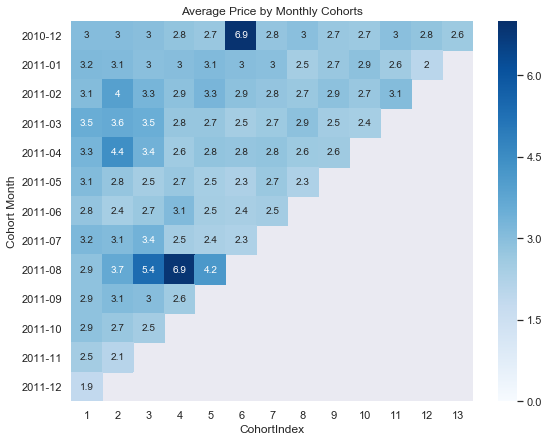

In [23]:
# Visualize average price metric

# Initialize an 9 by 7 inches plot figure
plt.figure(figsize=(9, 7))

# pequeno ajuste
average_price.index = [i[:7] for i in average_price.index.map(str)]

# Create the heatmap
sns.heatmap(average_price, annot=True, vmin=0, vmax=7, cmap='Blues')
plt.title('Average Price by Monthly Cohorts')
plt.ylabel('Cohort Month')
plt.show()

# CHAPTER 2 - Recency, Frequency, Monetary Value analysis

In this second chapter, you will learn about customer segments. Specifically, you will get exposure to recency, frequency and monetary value, create customer segments based on these concepts, and analyze your results.

#### Exercício 1 - Recency, Frequency, Monetary (RFM) segmentation

Recency: how recent was the client last purchase.
Frequency: how many purchases has the client done in the last 12 months.
Monetary value: how much has the client spent in the last 12 months


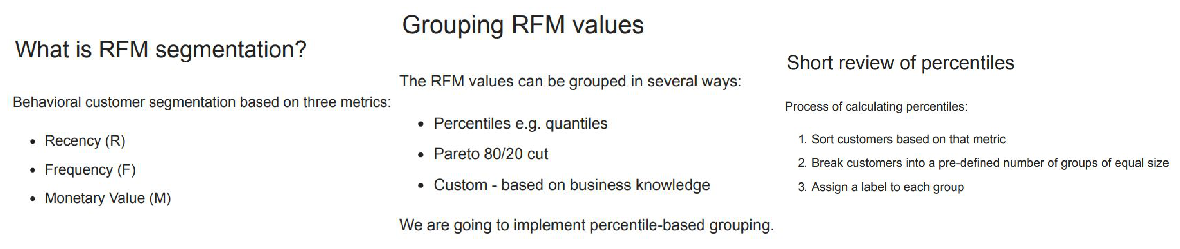

   CustomerId  Spend Spend_Quartile
4           7     58              1
0           3     75              1
1           0     99              1
3           6    109              2
6           5    139              2
7           1    240              3
2           9    262              3
8           2    270              4
5           4    279              4
9           8    326              4

Assigning labels:
 - Highest score to the best metric - best is not always highest e.g. recency
 - In this case, the label is inverse - the more recent the customer, the better

   CustomerId  Spend Spend_Quartile  Recency_Days Recency_Quartile
5           4    279              4            55                4
0           3     75              1            65                4
6           5    139              2            75                4
8           2    270              4           120                3
3           6    109              2           190                3
7           1    240   

,CustomerId,Spend,Spend_Quartile,Recency_Days,Recency_Quartile
5,4,279,4,55,Active
0,3,75,1,65,Active
6,5,139,2,75,Active
8,2,270,4,120,Lapsed
3,6,109,2,190,Lapsed
7,1,240,3,204,Inactive
4,7,58,1,276,Inactive
2,9,262,3,316,Churned
1,0,99,1,357,Churned
9,8,326,4,367,Churned


In [24]:
#vídeo

import random
# Data with eight CustomerID and a randomly calculated Spend values.
data = pd.DataFrame({'CustomerId': random.sample(range(10), 10), 'Spend': random.sample(range(350), 10)})

print("""Recency: how recent was the client last purchase.
Frequency: how many purchases has the client done in the last 12 months.
Monetary value: how much has the client spent in the last 12 months""")

plot_3('rfm', 'grouping_rfm', 'percentiles')

# Calculate percentiles with Python
spend_quartiles = pd.qcut(data['Spend'], q=4, labels=range(1,5))
data['Spend_Quartile'] = spend_quartiles
print(data.sort_values('Spend'))

#############################################################################

data['Recency_Days'] = random.sample(range(400), 10)

print("""\nAssigning labels:
 - Highest score to the best metric - best is not always highest e.g. recency
 - In this case, the label is inverse - the more recent the customer, the better\n""")

# Assigning labels

# Create numbered labels
r_labels = list(range(4, 0, -1))

# Divide into groups based on quartiles
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Create new column
data['Recency_Quartile'] = recency_quartiles

# Sort recency values from lowest to highest
print(data.sort_values('Recency_Days'))
# As you can see, the quartile labels are reversed, since the more recent customers are more valuable.

###########

print("""\nCustom labels of each quartile:""")

# We can define a list with string or any other values, depending on the use case.

# Create string labels
r_labels = ['Active', 'Lapsed', 'Inactive', 'Churned']

# Divide into groups based on quartiles
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Create new column
data['Recency_Quartile'] = recency_quartiles

# Sort values from lowest to highest
data.sort_values('Recency_Days')


Exercício 2

In [25]:
# Calculate Spend quartiles (q=4)

data = pd.DataFrame({'CustomerId': random.sample(range(10), 10), 'Spend': random.sample(range(350), 10)})

# Create a spend quartile with 4 groups and Assign the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Print data with sorted Spend values
data.sort_values('Spend')


,CustomerId,Spend,Spend_Quartile
5,3,40,1
6,5,55,1
3,1,73,1
7,6,80,2
9,0,99,2
1,2,162,3
2,9,201,3
8,4,256,4
0,7,320,4
4,8,348,4


Exercício 3

In [26]:
# Calculate Recency deciles (q=10)

data = pd.DataFrame({'CustomerId': random.sample(range(10), 10), 'Recency_Days': random.sample(range(500), 10)})

# Store labels from 4 to 1 in a decreasing order (here, in this case, it is in a decreasing order)
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
data.sort_values('Recency_Days')


,CustomerId,Recency_Days,Recency_Quartile
6,3,42,4
7,8,62,4
0,7,72,4
2,6,88,3
9,9,96,3
1,5,121,2
4,1,125,2
3,0,216,1
5,2,350,1
8,4,447,1


#### Exercício 4 - Calculating RFM metrics

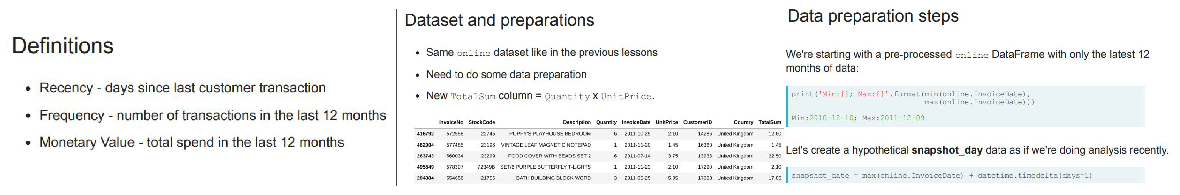

Min:2010-12-01 08:26:00; Max:2011-12-09 12:49:00
snapshot_date:  2011-12-10 12:49:00


,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15
12823,297,1,306.00
12824,60,6,106.38


In [27]:
#vídeo

from datetime import timedelta

plot_3('definitions', 'prep', 'prep_2')

# Define new TotalSum column 
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

# We're starting with a pre-processed online DataFrame with only the latest 12 months of data:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate), max(online.InvoiceDate)))

# Let's create a hypothetical snapshot_day data as if we're doing analysis recently.
snapshot_date = max(online.InvoiceDate) + timedelta(days=1)
print("snapshot_date: ", snapshot_date)


# ---> Calculate RFM metrics
# Aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, \
                                               'InvoiceNo': 'count', 'TotalSum': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)

# Check the first rows
datamart.head(7)


Exercício 5

In [28]:
# Largest Frequency value

#  What is the average Frequency value? 
np.mean(datamart['Frequency'])

19.14725749797352

Exercício 6

In [29]:
# Calculate RFM values

online['TotalSum'] = online['Quantity'] * online['UnitPrice']
snapshot_date = max(online.InvoiceDate) + timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                               'InvoiceNo': 'count',
                                               'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


#### Exercício 7 - Building RFM segments

In [30]:
#vídeo

# We will calculate quartile value for each column and name then R, F, M

# Recency, Frequency and Monetary quartiles
r_labels = range(4, 0, -1)  # don't forget the order
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

datamart = datamart.assign(R = r_quartiles.values)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

###############################

# ---> Build RFM Segment and RFM Score

# - Concatenate RFM quartile values to RFM_Segment
# - Sum RFM quartiles values to RFM_Score

def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R', 'F', 'M']].sum(axis=1)

datamart.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12.0
12748,1,967,7522.06,4,4,4,444,12.0
12749,4,37,813.45,4,4,4,444,12.0
12820,3,17,268.02,4,3,3,433,10.0
12822,71,9,146.15,2,2,3,223,7.0


Exercício 8

In [31]:
# Calculate 3 groups for Recency and Frequency

datamart_3 = datamart.copy()
datamart_3.drop(['R', 'F', 'M', 'RFM_Segment', 'RFM_Score'], axis=1, inplace=True)

# Create labels for Recency and Frequency, and Monetary Values
r_labels = range(3, 0, -1); 
f_labels = range(1, 4)
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart_3['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart_3['Frequency'], q=3, labels=f_labels)
m_groups = pd.qcut(datamart_3['MonetaryValue'], q=3, labels=m_labels)

# Create new columns R and F 
datamart_3 = datamart_3.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)


Exercício 9

In [32]:
# Calculate RFM Score 

# Calculate RFM_Score
datamart_3['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
datamart_3.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12747,2,27,992.82,3,3,3,12.0
12748,1,967,7522.06,3,3,3,12.0
12749,4,37,813.45,3,3,3,12.0
12820,3,17,268.02,3,3,3,10.0
12822,71,9,146.15,2,2,2,7.0
12823,297,1,306.00,1,1,3,5.0
12824,60,6,106.38,2,2,2,6.0
12826,3,17,291.26,3,3,3,10.0
12827,33,2,44.55,2,1,1,5.0


#### Exercício 10 - Analyzing RFM table

In [33]:
#vídeo

# Largest RFM segments
print(" - Largest RFM segments: (always nice to see the size of each before doing something) \n")
print(datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10], "\n")

# Filtering on RFM segments
print(" - Filtering on RFM segments: Select bottom RFM segment '111' and view top 5 rows:\n")
print(datamart[datamart['RFM_Segment']=='111'][:5], "\n")

# Summary metrics per RFM Score
print(" - Summary metrics per RFM Score:\n")
print(datamart.groupby('RFM_Score').agg({'Recency': 'mean', 
                                         'Frequency': 'mean', 
                                         'MonetaryValue': ['mean', 'count'] }).round(1))


 - Largest RFM segments: (always nice to see the size of each before doing something) 

RFM_Segment
444    382
111    346
211    168
344    162
233    132
222    130
311    120
433    119
333    118
122    116
dtype: int64 

 - Filtering on RFM segments: Select bottom RFM segment '111' and view top 5 rows:

            Recency  Frequency  MonetaryValue  R  F  M RFM_Segment  RFM_Score
CustomerID                                                                   
12837           173          2          10.55  1  1  1         111        3.0
12852           295          2          32.55  1  1  1         111        3.0
12902           265          4          42.03  1  1  1         111        3.0
12922           161          4          57.24  1  1  1         111        3.0
12929           312          3          42.90  1  1  1         111        3.0 

 - Summary metrics per RFM Score:

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score   

In [34]:
# Grouping into named segments

# Use RFM score to group customers into Gold, Silver and Bronze segments.
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
    
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

print("""The way we segmented it ended up making sense but it could take trial and error to define the exact thresholds. 
(see k-means clustering next)""")

datamart.groupby('General_Segment').agg({'Recency': 'mean', 
                                         'Frequency': 'mean', 
                                         'MonetaryValue': ['mean', 'count']}).round(1).sort_values([('Recency', 'mean')])
# ordenei depois de ver a tabela só para ficar por ordem de importância

The way we segmented it ended up making sense but it could take trial and error to define the exact thresholds. 
(see k-means clustering next)


Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Gold               27.4      40.1         817.6  1402
Silver            100.1       8.0         146.7  1605
Bronze            216.1       2.6          38.3   694

Exercício 11

In [35]:
# Find average value for RFM Score segment

# What is the average MonetaryValue for the segment with RFM_Score of 9 (nine)?
np.mean(datamart[datamart['RFM_Score'] == 9]['MonetaryValue'])

330.00591066282414

Exercício 12

In [36]:
# Creating custom segments

# ... (criar o general segment)
datamart.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12747,2,27,992.82,4,4,4,444,12.0,Gold
12748,1,967,7522.06,4,4,4,444,12.0,Gold
12749,4,37,813.45,4,4,4,444,12.0,Gold
12820,3,17,268.02,4,3,3,433,10.0,Gold
12822,71,9,146.15,2,2,3,223,7.0,Silver


Exercício 13

In [37]:
# Analyzing custom segments

datamart.groupby('General_Segment').agg({'Recency': 'mean', 
                                         'Frequency': 'mean', 
                                         'MonetaryValue': ['mean', 'count']}).round(1).sort_values([('Recency', 'mean')])

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Gold               27.4      40.1         817.6  1402
Silver            100.1       8.0         146.7  1605
Bronze            216.1       2.6          38.3   694

# Chapter 3 - Data pre-processing for clustering

Once you created some segments, you want to make predictions. However, you first need to master practical data preparation methods to ensure your k-means clustering algorithm will uncover well-separated, sensible segments.

#### Exercício 1 - Data pre-processing

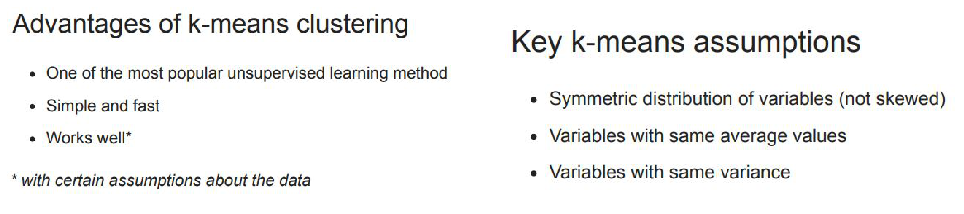

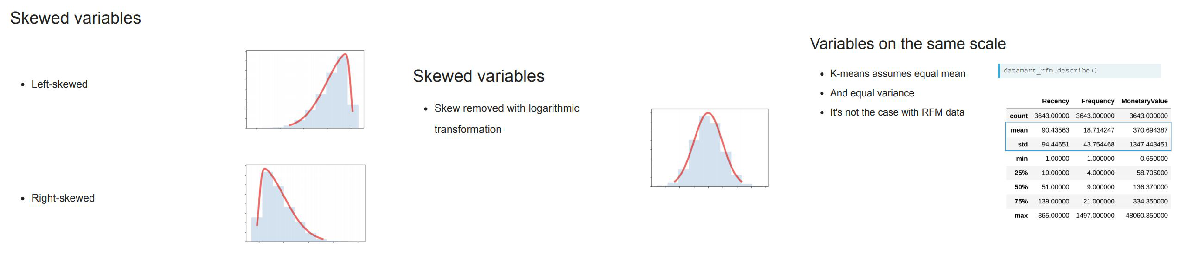

,Recency,Frequency,MonetaryValue,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


In [38]:
#vídeo

plot_2('kmeans_advantages', 'kmeans_assumptions', wspace=0.1)
plot_3('skewed', 'log_transf', 'same_scale_variables', wspace=0.1) 

# log transformations only work with positive values (most of the cases) but we can also deal with negative values (ver dps)

datamart.describe()

Exercício 2

In [39]:
# Assumptions of k-means

# Which one of these is not an assumption of k-means?
print("non-symmetrical distribution of variables")

non-symmetrical distribution of variables


Exercício 3

In [40]:
# Calculate statistics of variables (aqui vou usar os dados do datamart)

# Print the average values of the variables in the dataset
print(datamart.mean(), "\n")

# Print the standard deviation of the variables in the dataset
print(datamart.std())

# Get the key statistics of the dataset
print("""\nYou can see that the averages and standard deviations are different across the variables:""")
datamart.describe()


Recency           94.298568
Frequency         19.147257
MonetaryValue    380.535069
R                  2.516347
F                  2.427722
M                  2.499325
RFM_Segment             inf
RFM_Score          7.443394
dtype: float64 

Recency            99.974969
Frequency          44.831615
MonetaryValue    1474.285937
R                   1.128292
F                   1.151018
M                   1.118547
RFM_Score           2.825434
dtype: float64

You can see that the averages and standard deviations are different across the variables:


,Recency,Frequency,MonetaryValue,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


#### Exercício 4 - Managing skewed variables

Identifying skewness:


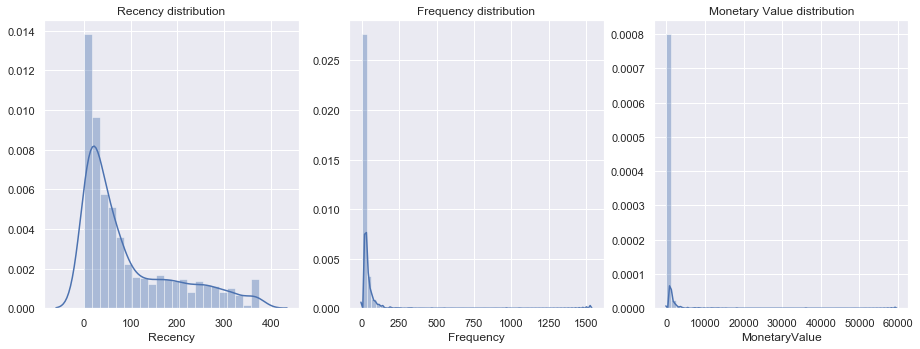

Data transformations to manage skewness:


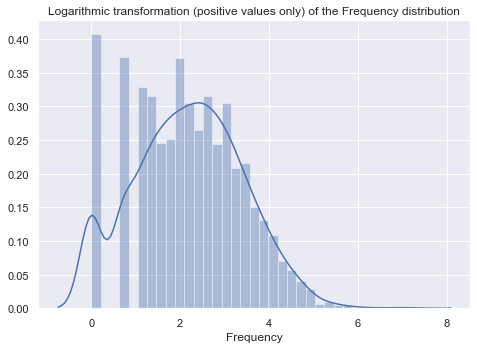

Dealing with negative values (if it's the case):
 - Adding a constant before log transformation
 - Cube root transformation


In [41]:
#vídeo

print("Identifying skewness:")

# Exploring distribution of Recency, Frequency and Monetary Value
plt.subplot(1, 3, 1)
sns.distplot(datamart['Recency'])
plt.title('Recency distribution')

plt.subplot(1, 3, 2)
sns.distplot(datamart['Frequency'])
plt.title('Frequency distribution')

plt.subplot(1, 3, 3)
sns.distplot(datamart['MonetaryValue'])
plt.title('Monetary Value distribution')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.1)
plt.show()

# Data transformations to manage skewness
print("Data transformations to manage skewness:")

frequency_log= np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.title('Logarithmic transformation (positive values only) of the Frequency distribution', fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.1)
plt.show()

print("""Dealing with negative values (if it's the case):
 - Adding a constant before log transformation
 - Cube root transformation""")


Exercício 5

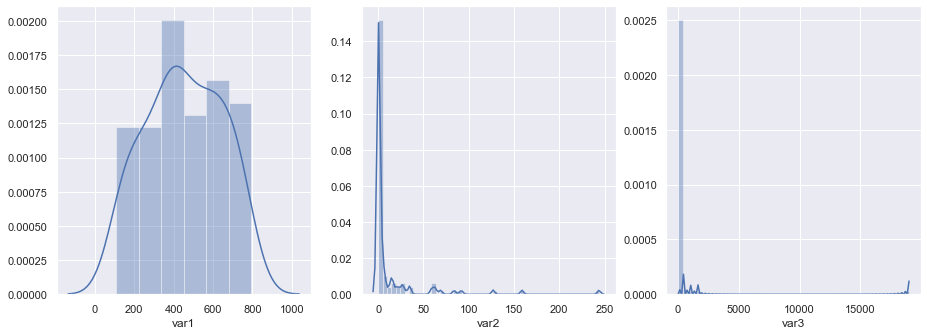

In [42]:
# Detect skewed variables

data = pd.read_csv(data_folder + "dummy_data.csv")

# Plot distribution of var1
plt.subplot(1, 3, 1); sns.distplot(data['var1'])

# Plot distribution of var2
plt.subplot(1, 3, 2); sns.distplot(data['var2'])

# Plot distribution of var3
plt.subplot(1, 3, 3); sns.distplot(data['var3'])

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.1)
plt.show()

Exercício 6

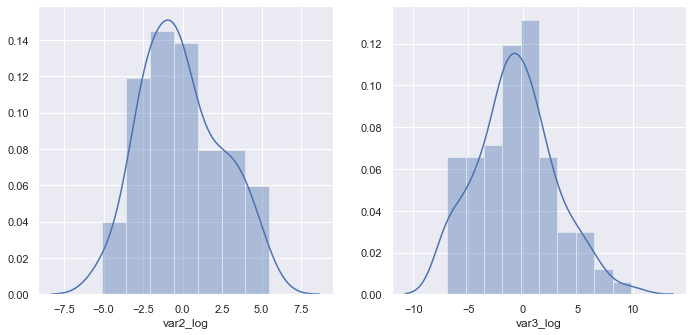

The skewness was improved with just applying the log transformation


In [43]:
# Manage skewness

# Now your goal will be to remove skewness from var2 and var3 as they had a non-symmetric distribution.

# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(1, 2, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(1, 2, 2); sns.distplot(data['var3_log'])

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0.2, hspace=0.1)
plt.show()
print("The skewness was improved with just applying the log transformation")

#### Exercício 7 - Centering and scaling data

In [44]:
#vídeo

datamart_rfm = datamart[['Recency', 'Frequency', 'MonetaryValue']]

print("Identifying an issue:")
print("Analyze key statistics of the dataset + Compare mean and standard deviation:")
print(datamart_rfm.describe())

# Centering variables
print("""\nCentering variables with different means
 - K-means works well on variables with the same mean.
 - Centering variables is done by subtracting average value from each observation:\n""")
datamart_centered = datamart_rfm - datamart_rfm.mean()
print(datamart_centered.describe().round(2))

# Scaling variables
print("""\nScaling variables with different variance
 - K-means works better on variables with the same variance / standard deviation
 - Scaling variables is done by dividing them by standard deviation of each:\n""")
datamart_scaled = datamart_rfm / datamart_rfm.std()
print(datamart_scaled.describe().round(2))

###############################################################

print("""\n===============================================================================================
Combining centering and scaling
 - Subtract mean and divide by standard deviation manually
 - OR use a scaler from scikit-learn library (returns numpy.ndarray object):\n""")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(datamart_rfm)

datamart_normalized = scaler.transform(datamart_rfm)

print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))


Identifying an issue:
Analyze key statistics of the dataset + Compare mean and standard deviation:
           Recency    Frequency  MonetaryValue
count  3701.000000  3701.000000    3701.000000
mean     94.298568    19.147257     380.535069
std      99.974969    44.831615    1474.285937
min       1.000000     1.000000       0.650000
25%      19.000000     4.000000      59.400000
50%      52.000000     9.000000     140.300000
75%     151.000000    21.000000     337.800000
max     374.000000  1532.000000   59596.070000

Centering variables with different means
 - K-means works well on variables with the same mean.
 - Centering variables is done by subtracting average value from each observation:

       Recency  Frequency  MonetaryValue
count  3701.00    3701.00        3701.00
mean      0.00       0.00           0.00
std      99.97      44.83        1474.29
min     -93.30     -18.15        -379.89
25%     -75.30     -15.15        -321.14
50%     -42.30     -10.15        -240.24
75%      5

Exercício 8

In [45]:
# Center and scale manually

data = pd.read_csv(data_folder + "dummy_data.csv").drop('Unnamed: 0', axis=1)

# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
data_normalized.describe().round(2)


,var1,var2,var3
count,100.00,100.00,100.00
mean,0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-1.79,-0.38,-0.12
25%,-0.76,-0.37,-0.12
50%,-0.05,-0.36,-0.12
75%,0.82,-0.20,-0.12
max,1.78,6.57,9.84


Exercício 9

In [46]:
# Center and scale with StandardScaler()

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
data_normalized.describe().round(2)


,var1,var2,var3
count,100.00,100.00,100.00
mean,0.00,0.00,0.00
std,1.01,1.01,1.01
min,-1.80,-0.38,-0.12
25%,-0.76,-0.37,-0.12
50%,-0.05,-0.36,-0.12
75%,0.82,-0.20,-0.12
max,1.79,6.60,9.89


#### Exercício 10 - Pre-processing pipeline

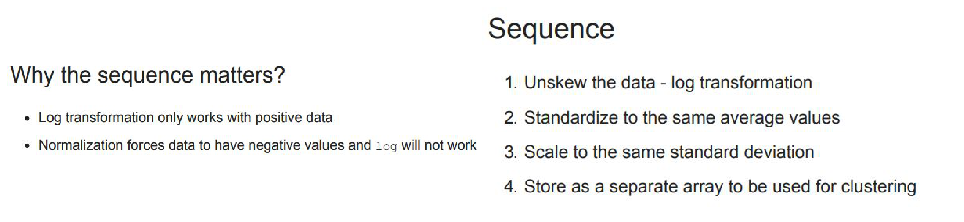

array([[-2.19564198,  0.90952097,  1.48288174],
       [-2.68455336,  3.84505048,  3.02243314],
       [-1.7067306 ,  1.16799951,  1.33138958],
       ...,
       [-1.21781921, -1.22561047, -1.15998279],
       [-1.7067306 ,  2.3271315 ,  0.85189033],
       [-0.03159076,  0.4273268 ,  0.78364369]])

In [47]:
#vídeo

plot_2('pipe_1', 'pipe_2')

# Coding the sequence

# - Unskew the data with log transformation
datamart_log = np.log(datamart_rfm)

# - Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

# Store it separately for clustering
datamart_normalized = scaler.transform(datamart_log)
datamart_normalized

Exercício 11

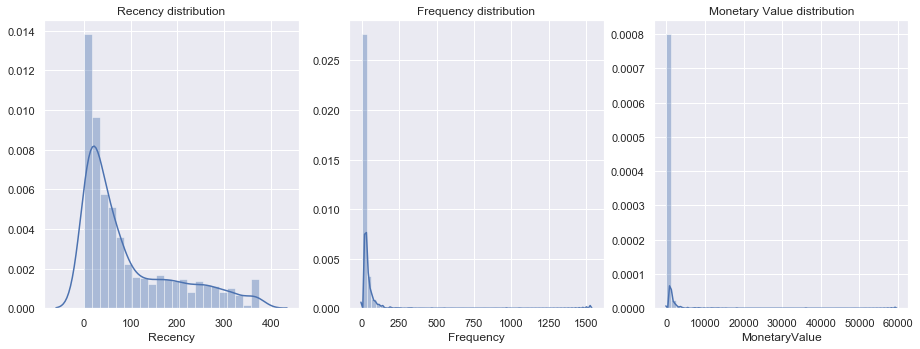

In [48]:
# Visualize RFM distributions

# Exploring distribution of Recency, Frequency and Monetary Value
plt.subplot(1, 3, 1)
sns.distplot(datamart['Recency'])
plt.title('Recency distribution')

plt.subplot(1, 3, 2)
sns.distplot(datamart['Frequency'])
plt.title('Frequency distribution')

plt.subplot(1, 3, 3)
sns.distplot(datamart['MonetaryValue'])
plt.title('Monetary Value distribution')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.1)
plt.show()

Exercício 12

In [49]:
# Pre-process RFM data

# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized.head(7)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-2.195642,0.909521,1.482882
12748,-2.684553,3.845050,3.022433
12749,-1.706731,1.168000,1.331390
12820,-1.909647,0.530005,0.487337
12822,0.322128,0.008268,0.026297
12823,1.331521,-1.794238,0.588089
12824,0.203393,-0.324358,-0.215172


Exercício 13

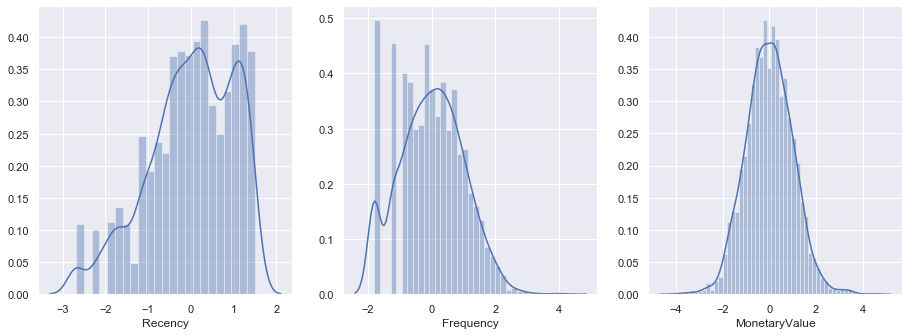

In [50]:
# Visualize the normalized variables

# Plot recency distribution
plt.subplot(1, 3, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(1, 3, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(1, 3, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.1)
plt.show()


# Chapter 4 - Customer Segmentation with K-means

In this final chapter, you will use the data you pre-processed in Chapter 3 to identify customer clusters based on their recency, frequency, and monetary value.

#### Exercício 1 - Practical implementation of k-means clustering

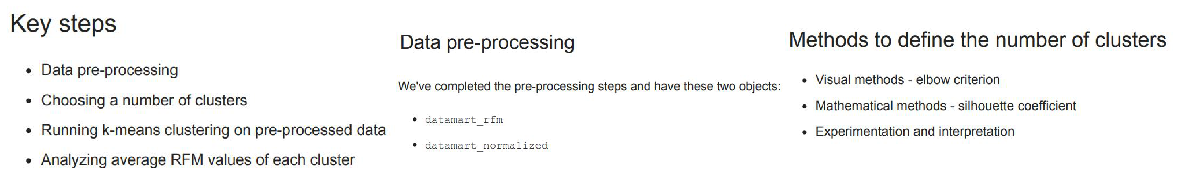

Analyzing average RFM values of each cluster - The result of a simple 2-cluster solution:



Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.0      36.0         729.0  1676
1         145.0       5.0          92.0  2025

In [51]:
#vídeo

plot_3('steps', 'preprocessing', 'define_k')

# Running k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

##########################################

# Analyzing average RFM values of each cluster

# Create a cluster label column in the original DataFrame:
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster:
print("""Analyzing average RFM values of each cluster - The result of a simple 2-cluster solution:\n""")

datamart_rfm_k2.groupby(['Cluster']).agg({'Recency': 'mean', 
                                          'Frequency': 'mean', 
                                          'MonetaryValue': ['mean','count'],}).round(0)

# datamart_rfm_k2.head()

Exercício 2

In [52]:
# Run KMeans

# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_


Exercício 3

In [53]:
# Assign labels to raw data

# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1)


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          78.4      13.6         232.0  1621
1         171.6       3.1          55.3  1225
2          13.8      52.7        1128.1   855

#### Exercício 4 - Choosing the number of clusters

Methods:
 - Visual methods - elbow criterion
 - Mathematical methods - silhouette coefficient
 - Experimentation and interpretation


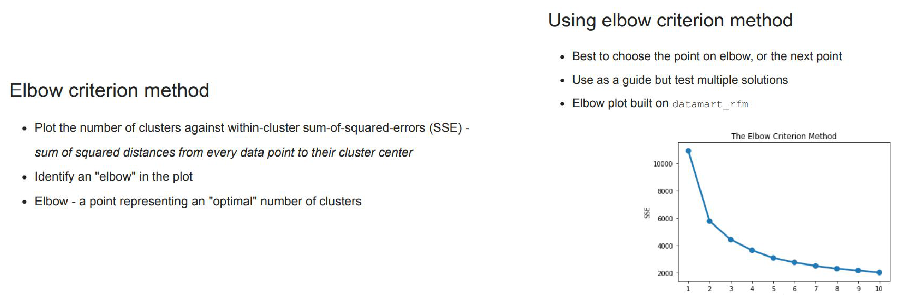

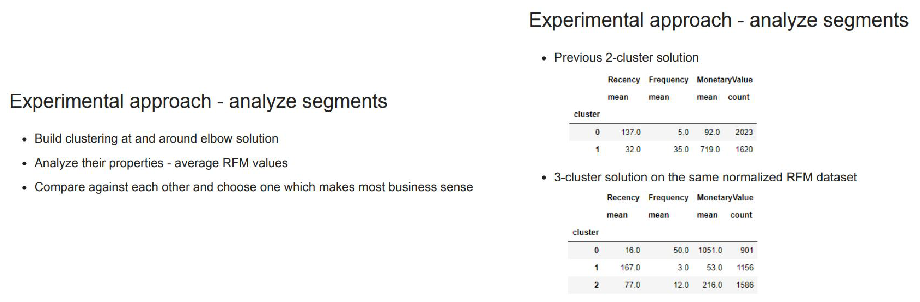

choose one which makes more sense


In [54]:
#vídeo

print("""Methods:
 - Visual methods - elbow criterion
 - Mathematical methods - silhouette coefficient
 - Experimentation and interpretation""")

plot_2('elbow_1', 'elbow_2')
plot_2('experimental_1', 'experimental_2')
print("choose one which makes more sense")

Exercício 5

In [55]:
# Calculate sum of squared errors

sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_


Exercício 6

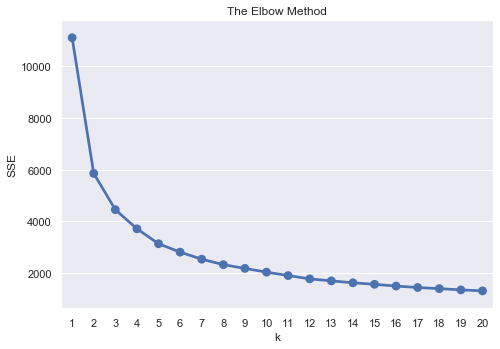

4-5 clusters?


In [56]:
# Plot sum of squared errors

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.1)
plt.show()
print("4-5 clusters?")

#### Exercício 7 - Profile and interpret segments

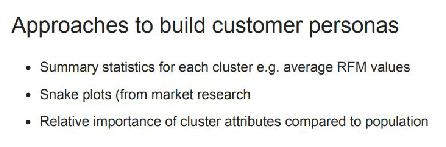


SUMMARY STATISTICS OF EACH CLUSTER:

 - Run k-means segmentation for several k values around the recommended value.
 - Create a cluster label column in the original DataFrame:
 - Calculate average RFM values and sizes for each cluster:

        Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          33.0      36.0         729.0  1676
1         145.0       5.0          92.0  2025

... and then repeat the same for k=3, and compare average RFM values of each clustering solution:

        Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          78.4      13.6         232.0  1621
1         171.6       3.1          55.3  1225
2          13.8      52.7        1128.1   855


In [57]:
#vídeo

plot_1('customer_personas')
print("==============================================================================================================\n")

print("""SUMMARY STATISTICS OF EACH CLUSTER:\n""")

print(""" - Run k-means segmentation for several k values around the recommended value.
 - Create a cluster label column in the original DataFrame:""")

kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(datamart_normalized)
cluster_labels = kmeans.labels_
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)

print(""" - Calculate average RFM values and sizes for each cluster:\n""")

print(datamart_rfm_k2.groupby(['Cluster']).agg({'Recency': 'mean', 'Frequency': 'mean', 
                                          'MonetaryValue': ['mean', 'count']}).round(0))

print("""\n... and then repeat the same for k=3, and compare average RFM values of each clustering solution:\n""")

grouped = datamart_rfm_k3.groupby(['Cluster'])
print(grouped.agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': ['mean', 'count']}).round(1))

SNAKE PLOTS TO UNDERSTAND AND COMPARE SEGMENTS:

 - Market research technique to compare different segments
 - Visual representation of each segment's attributes
 - Need to first normalize data (center & scale)
 - Plot each cluster's average normalized values of each attribute

Transform datamart_normalized as DataFrame and add a Cluster column:
             Recency  Frequency  MonetaryValue  Cluster
CustomerID                                             
12747      -2.195642   0.909521       1.482882        2
12748      -2.684553   3.845050       3.022433        2
12749      -1.706731   1.168000       1.331390        2
12820      -1.909647   0.530005       0.487337        2
12822       0.322128   0.008268       0.026297        0

Melt the data into a long format so RFM values and metric names are stored in 1 column each:
   CustomerID  Cluster Attribute     Value
0       12747        2   Recency -2.195642
1       12748        2   Recency -2.684553
2       12749        2   Recency -1.7

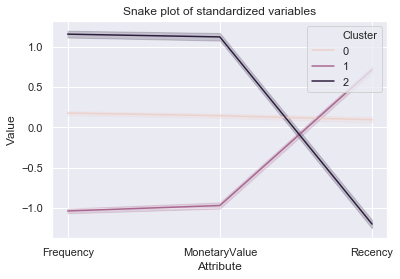

In [58]:
print("""SNAKE PLOTS TO UNDERSTAND AND COMPARE SEGMENTS:\n""")

print(""" - Market research technique to compare different segments
 - Visual representation of each segment's attributes
 - Need to first normalize data (center & scale)
 - Plot each cluster's average normalized values of each attribute\n""")

print("Transform datamart_normalized as DataFrame and add a Cluster column:")

datamart_normalized = pd.DataFrame(datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']
print(datamart_normalized.head())

print("\nMelt the data into a long format so RFM values and metric names are stored in 1 column each:")

datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                        var_name='Attribute', 
                        value_name='Value')

print(datamart_melt.head())

# Visualize a snake plot
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.title('Snake plot of standardized variables')
plt.show()

RELATIVE IMPORTANCE OF SEGMENT ATTRIBUTES:
 - Useful technique to identify relative importance of each segment's attribute
 - Calculate average values of each cluster
 - Calculate average values of population
 - Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals 
population average)

Analyze and plot relative importance:
The further a ratio is from 0, the more important that attribute is for a segment relative to the total population.

Printed output:
         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.17      -0.29          -0.39
1           0.82      -0.84          -0.85
2          -0.85       1.75           1.96

Heatmap plot for easier interpretation:


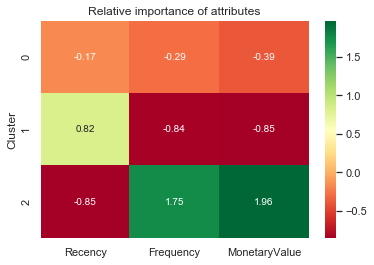

In [59]:
print("""RELATIVE IMPORTANCE OF SEGMENT ATTRIBUTES:
 - Useful technique to identify relative importance of each segment's attribute
 - Calculate average values of each cluster
 - Calculate average values of population
 - Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals 
population average)\n""")

cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()

relative_imp = cluster_avg / population_avg - 1

print("""Analyze and plot relative importance:
The further a ratio is from 0, the more important that attribute is for a segment relative to the total population.\n""")

print("Printed output:")
print(relative_imp.round(2))

print("""\nHeatmap plot for easier interpretation:""")
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Relative importance of attributes')
plt.show()

Exercício 8

In [60]:
datamart_normalized.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,2
12748,-2.684553,3.845050,3.022433,2
12749,-1.706731,1.168000,1.331390,2
12820,-1.909647,0.530005,0.487337,2
12822,0.322128,0.008268,0.026297,0


In [61]:
# Prepare data for the snake plot

# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                        # Assign CustomerID and Cluster as ID variables
                        id_vars=['CustomerID', 'Cluster'],
                        # Assign RFM values as value variables
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        # Name the variable and value
                        var_name='Metric', value_name='Value')

datamart_melt.head()

,CustomerID,Cluster,Metric,Value
0,12747,2,Recency,-2.195642
1,12748,2,Recency,-2.684553
2,12749,2,Recency,-1.706731
3,12820,2,Recency,-1.909647
4,12822,0,Recency,0.322128


Exercício 9

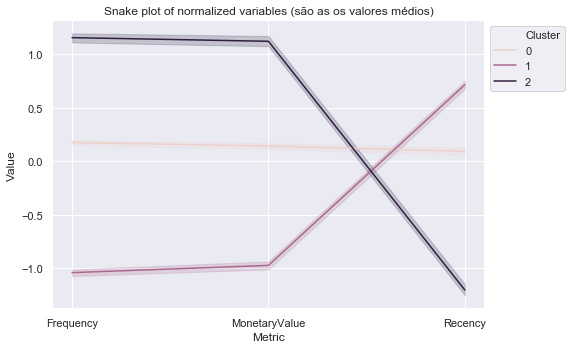

In [62]:
# Visualize snake plot

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')

plt.title('Snake plot of normalized variables (são as os valores médios)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1, 1))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


In [63]:
# exemplo
np.mean(datamart_melt[(datamart_melt['Cluster'] == 1) & (datamart_melt['Metric'] == 'Recency')]['Value'])

0.7147301952366736

Exercício 10

In [64]:
# Calculate relative importance of each attribute

# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.17,-0.29,-0.39
1,0.82,-0.84,-0.85
2,-0.85,1.75,1.96


In [65]:
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,78.353486,13.578038,232.042659
1,171.576327,3.116735,55.291902
2,13.809357,52.673684,1128.054456


In [66]:
population_avg

Recency           94.298568
Frequency         19.147257
MonetaryValue    380.535069
dtype: float64

Exercício 11

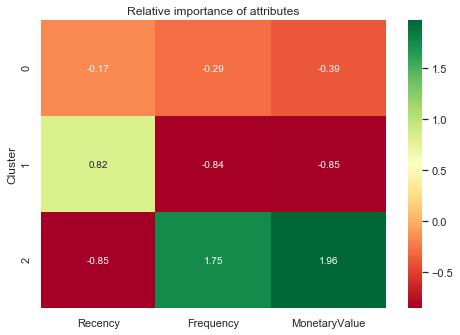

In [67]:
# Plot relative importance heatmap

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')

plt.title('Relative importance of attributes')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

#### Exercício 12 - End-to-end segmentation solution

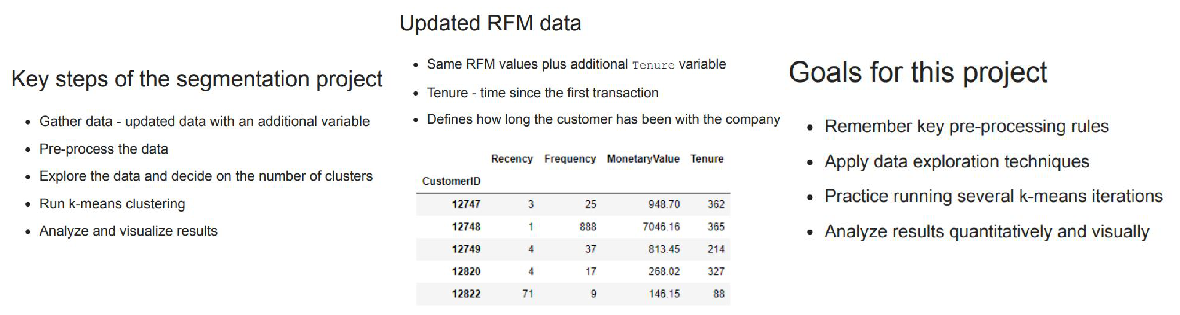

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12747,3,25,948.70,362
12748,1,888,7046.16,365
12749,4,37,813.45,214
12820,4,17,268.02,327
12822,71,9,146.15,88


In [68]:
#vídeo

plot_3('key_steps', 'updated_rfm', 'goals_project')

datamart_rfmt = pd.read_csv(data_folder + "datamart_rfmt_4.csv", index_col="CustomerID")
datamart_rfmt.head()

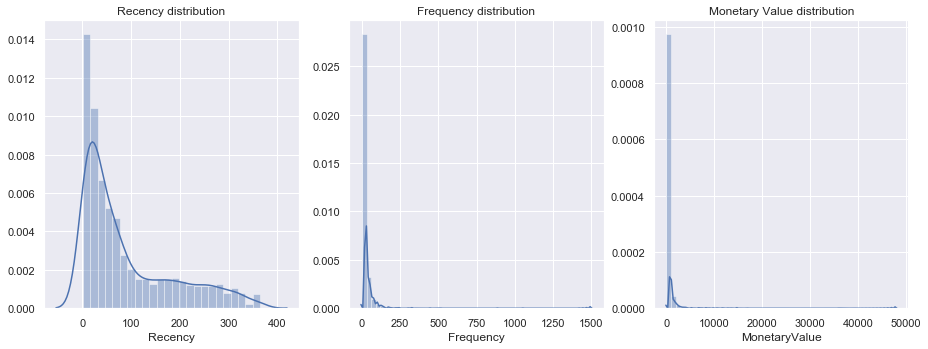

In [69]:
plt.subplot(1, 3, 1)
sns.distplot(datamart_rfmt['Recency'])
plt.title('Recency distribution')
plt.subplot(1, 3, 2)
sns.distplot(datamart_rfmt['Frequency'])
plt.title('Frequency distribution')
plt.subplot(1, 3, 3)
sns.distplot(datamart_rfmt['MonetaryValue'])
plt.title('Monetary Value distribution')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0.1)
plt.show()

Exercício 13

In [70]:
# Pre-process data

# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler()
scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)
datamart_rfmt_normalized

array([[-2.00220213,  0.865157  ,  1.4649405 ,  0.91969471],
       [-2.81451782,  3.81527235,  2.99469233,  0.92875045],
       [-1.78948954,  1.18911731,  1.34759823,  0.34290634],
       ...,
       [-1.27697541, -1.22195523, -1.15248482, -3.26323697],
       [-1.78948954,  2.35670574,  0.86642248,  0.84442534],
       [-0.03348042,  0.44304102,  0.79793723,  0.27958601]])

Exercício 14

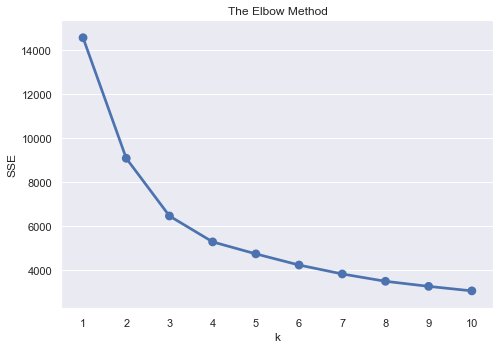

The elbow is visible around 3-4 clusters


In [71]:
# Calculate and plot sum of squared errors

sse = {}

# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.1)
plt.show()
print("The elbow is visible around 3-4 clusters")

Exercício 15

In [72]:
# Build 4-cluster solution

# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([0, 0, 0, ..., 3, 0, 2])

Exercício 16

In [73]:
# Analyze the segments

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({'Recency': 'mean', 'Frequency': 'mean', 'MonetaryValue': 'mean',
             'Tenure': ['mean', 'count']}).round(1)


Recency Frequency MonetaryValue Tenure      
           mean      mean          mean   mean count
Cluster                                             
0          13.4      53.7        1141.8  279.6   776
1         203.3       3.3          58.3  221.6   919
2          89.6      15.1         278.3  247.9  1203
3          32.8       7.2         102.1   45.0   745

#### Exercício 17 - end

In [74]:
# Vídeo

# Fim